In [179]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt

df = pd.read_csv('health_data.csv')

print(df.head())

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0


In [180]:
#randomize indces, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

#print('Train data is : \n', train_df.head(), ' \nnumber of rows = {}'.format(train_df.shape[0]))
#print('Test data is : \n', test_df.head(), ' \nnumber of rows = {}'.format(test_df.shape[0]))

In [181]:
x_train = train_df.iloc[:,1:4]
y_train = train_df.iloc[:,4]

x_test = test_df.iloc[:,1:4]
y_test = test_df.iloc[:,4]

x_train['ones'] = 1
x_test['ones'] = 1

for col in ['age', 'restbps', 'chol']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())
    
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

        age   restbps      chol  ones
0  1.897102  1.349159  1.387534     1
1  0.823240 -0.121891 -2.060150     1
2 -1.190252 -1.483974 -0.172996     1
3 -1.257369 -1.483974  0.879454     1
4  0.621890  0.913292  0.679852     1
0    1
1    0
2    0
3    0
4    1
Name: category, dtype: int64
        age   restbps      chol  ones
0 -1.511141 -1.091907 -0.028967     1
1 -1.511141 -1.256591 -1.186284     1
2 -1.149222 -1.146801 -0.915038     1
3 -1.366373 -1.366380 -0.264047     1
4  1.746131  0.609824  2.484580     1
0    0
1    0
2    0
3    0
4    1
Name: category, dtype: int64


In [182]:
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
print(X_train.shape)
print(X_test.shape)

#print(W.shape)
Y_train = y_train.to_numpy()
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = y_test.to_numpy()
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))
print(Y_train.shape)
print(Y_test.shape)

(489, 4)
(211, 4)
(489, 1)
(211, 1)


In [183]:
def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def predict(W,X,threshold):
    Z = sigmoid(np.matmul(X,W))
    Z[Z>threshold] = 1
    Z[Z<=threshold] = 0
    return Z

In [201]:
num_iter = 1000
rate = 0.01
W_init = np.random.random((X_train.shape[1],1))

# Cross Entropy Loss

In [202]:
def loss(W,X,Y):
    eps = 1e-14
    mean = sigmoid(np.matmul(X,W)) #assuming that the function will calc sigmoid elementwise
    #mean shape = (489,1)
    #y shape = (489,1)
    logloss = -(np.mean(np.multiply(Y,np.log(mean + eps))) + np.mean(np.multiply(1-Y,np.log(1-mean + eps))))
    return logloss

def gradient(W,X,Y):
    mean = sigmoid(np.matmul(X,W))
    return  X.T@((Y-mean)*mean*(1-mean))


def sgd(W,X,Y,X_test,Y_test,rate,num_iter):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradient(W,X,Y)
        W = W + rate*grad
        train_loss.append(loss(W,X,Y))
        test_loss.append(loss(W,X_test,Y_test))
    return W, train_loss, test_loss



[[ 1.85137635]
 [ 0.74073498]
 [ 0.31195887]
 [-0.55525203]]


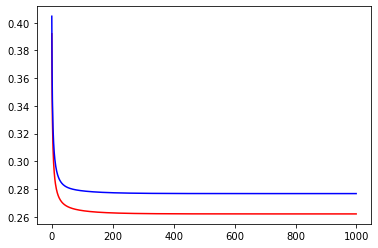

In [203]:
W = np.copy(W_init)
W = W*0.001
W, train_loss, test_loss = sgd(W,X_train,Y_train,X_test,Y_test,rate,num_iter)

print(W)

plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

# Cross Entropy Loss with L2 Regularisation

In [204]:
def gradientL2(W,X,Y,lam):
    mean = sigmoid(np.matmul(X,W))
    return X.T@((Y-mean)*mean*(1-mean)) - 2*lam*W

def lossL2(W,X,Y,lam):
    mean = sigmoid(np.matmul(X,W))
    logloss = -(np.mean(np.multiply(Y,np.log(mean))) + np.mean(np.multiply(1-Y,np.log(1-mean)))) + lam*np.mean(np.multiply(W,W))
    return logloss

def sgdL2(W,X,Y,X_test,Y_test,rate,num_iter,lam):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradientL2(W,X,Y,lam)
        W = W + rate*grad
        train_loss.append(lossL2(W,X,Y,lam))
        test_loss.append(lossL2(W,X_test,Y_test,lam))
    return W, train_loss, test_loss                                                                                                                                                                                                                

[[ 1.84878948]
 [ 0.74118411]
 [ 0.31226527]
 [-0.55477574]]


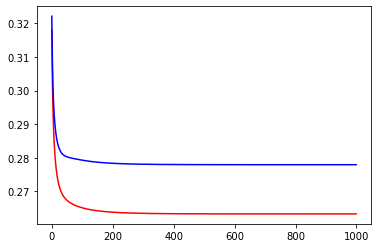

In [205]:
W2 = np.random.random((X_train.shape[1],1))
lam2 = 0.001
W2, train_loss_L2, test_loss_L2 = sgdL2(W2,X_train,Y_train,X_test,Y_test,rate,num_iter,lam2)
print(W2)
plt.plot(train_loss_L2, 'r')
plt.plot(test_loss_L2, 'b')
plt.show()

[[ 37.54109596]
 [ 31.56010818]
 [ 16.05664098]
 [-41.692981  ]]
[[ 34.21000852]
 [ 28.27247351]
 [ 13.77667083]
 [-37.87834258]]
[[ 31.42638174]
 [ 25.53030236]
 [ 11.86264022]
 [-34.61529293]]
[[ 29.06890063]
 [ 23.21229521]
 [ 10.23574011]
 [-31.79458318]]
[[ 27.04869254]
 [ 21.2296177 ]
 [  8.83822292]
 [-29.33385107]]
[[ 25.29941191]
 [ 19.51598241]
 [  7.62686003]
 [-27.16994108]]
[[ 23.77067425]
 [ 18.02107836]
 [  6.56866793]
 [-25.25365932]]
[[ 22.42361789]
 [ 16.70612838]
 [  5.63804761]
 [-23.54613267]]
[[ 21.22784452]
 [ 15.54082575]
 [  4.81482599]
 [-22.01623903]]
[[ 20.15927099]
 [ 14.5011829 ]
 [  4.08288693]
 [-20.63876357]]
[[ 19.19859494]
 [ 13.56799461]
 [  3.42919582]
 [-19.39305533]]
[[ 18.33018142]
 [ 12.72572278]
 [  2.84309259]
 [-18.26203374]]
[[ 17.54124315]
 [ 11.96167528]
 [  2.31577086]
 [-17.2314439 ]]
[[ 16.82122873]
 [ 11.26539317]
 [  1.83988873]
 [-16.28929122]]
[[ 16.16136039]
 [ 10.62818774]
 [  1.40927396]
 [-15.42540689]]
[[ 15.55428065]
 [ 10.042

[[ 2.50392543]
 [-0.66446933]
 [-1.24149286]
 [-0.81126962]]
[[ 2.48728504]
 [-0.66543927]
 [-1.22879912]
 [-0.80169579]]
[[ 2.4707967 ]
 [-0.66631121]
 [-1.21623432]
 [-0.79225167]]
[[ 2.45445795]
 [-0.66708792]
 [-1.20379762]
 [-0.78293514]]
[[ 2.43826641]
 [-0.66777214]
 [-1.19148814]
 [-0.77374412]]
[[ 2.42221977]
 [-0.66836648]
 [-1.179305  ]
 [-0.76467656]]
[[ 2.40631574]
 [-0.66887351]
 [-1.1672473 ]
 [-0.75573047]]
[[ 2.39055213]
 [-0.66929571]
 [-1.15531413]
 [-0.7469039 ]]
[[ 2.37492679]
 [-0.66963552]
 [-1.14350457]
 [-0.73819494]]
[[ 2.35943761]
 [-0.66989527]
 [-1.13181769]
 [-0.72960173]]
[[ 2.34408255]
 [-0.67007727]
 [-1.12025254]
 [-0.72112242]]
[[ 2.32885961]
 [-0.67018373]
 [-1.10880818]
 [-0.71275524]]
[[ 2.31376685]
 [-0.67021682]
 [-1.09748363]
 [-0.70449841]]
[[ 2.29880236]
 [-0.67017865]
 [-1.08627794]
 [-0.69635024]]
[[ 2.28396429]
 [-0.67007125]
 [-1.07519013]
 [-0.68830902]]
[[ 2.26925084]
 [-0.66989663]
 [-1.06421921]
 [-0.68037311]]
[[ 2.25466022]
 [-0.6696

[[ 0.72892524]
 [-0.33349345]
 [-0.18161267]
 [-0.09582182]]
[[ 0.72477482]
 [-0.33187012]
 [-0.18014545]
 [-0.09495391]]
[[ 0.72064896]
 [-0.33025308]
 [-0.17869205]
 [-0.09409492]]
[[ 0.7165475 ]
 [-0.32864233]
 [-0.17725232]
 [-0.09324476]]
[[ 0.71247029]
 [-0.32703787]
 [-0.17582611]
 [-0.09240331]]
[[ 0.70841717]
 [-0.3254397 ]
 [-0.17441328]
 [-0.09157049]]
[[ 0.70438799]
 [-0.32384782]
 [-0.17301369]
 [-0.09074619]]
[[ 0.7003826 ]
 [-0.32226222]
 [-0.17162718]
 [-0.08993032]]
[[ 0.69640085]
 [-0.32068291]
 [-0.17025363]
 [-0.08912279]]
[[ 0.69244259]
 [-0.31910988]
 [-0.1688929 ]
 [-0.08832349]]
[[ 0.68850767]
 [-0.31754313]
 [-0.16754484]
 [-0.08753235]]
[[ 0.68459594]
 [-0.31598265]
 [-0.16620933]
 [-0.08674926]]
[[ 0.68070726]
 [-0.31442844]
 [-0.16488622]
 [-0.08597413]]
[[ 0.67684148]
 [-0.3128805 ]
 [-0.1635754 ]
 [-0.08520688]]
[[ 0.67299846]
 [-0.31133882]
 [-0.16227672]
 [-0.08444742]]
[[ 0.66917805]
 [-0.30980339]
 [-0.16099005]
 [-0.08369566]]
[[ 0.66538011]
 [-0.3082

[[ 0.25888784]
 [-0.12902537]
 [-0.04762961]
 [-0.02141324]]
[[ 0.25745075]
 [-0.1283388 ]
 [-0.04731655]
 [-0.02125793]]
[[ 0.25602175]
 [-0.12765575]
 [-0.04700581]
 [-0.02110392]]
[[ 0.2546008 ]
 [-0.12697619]
 [-0.04669737]
 [-0.02095119]]
[[ 0.25318783]
 [-0.12630011]
 [-0.04639122]
 [-0.02079974]]
[[ 0.25178282]
 [-0.1256275 ]
 [-0.04608733]
 [-0.02064954]]
[[ 0.25038571]
 [-0.12495833]
 [-0.04578568]
 [-0.02050059]]
[[ 0.24899646]
 [-0.1242926 ]
 [-0.04548626]
 [-0.02035287]]
[[ 0.24761501]
 [-0.12363028]
 [-0.04518905]
 [-0.02020638]]
[[ 0.24624134]
 [-0.12297136]
 [-0.04489402]
 [-0.0200611 ]]
[[ 0.24487538]
 [-0.12231583]
 [-0.04460116]
 [-0.01991702]]
[[ 0.24351711]
 [-0.12166366]
 [-0.04431046]
 [-0.01977413]]
[[ 0.24216647]
 [-0.12101485]
 [-0.04402188]
 [-0.01963242]]
[[ 0.24082341]
 [-0.12036938]
 [-0.04373542]
 [-0.01949188]]
[[ 0.2394879 ]
 [-0.11972722]
 [-0.04345106]
 [-0.01935249]]
[[ 0.2381599 ]
 [-0.11908838]
 [-0.04316877]
 [-0.01921424]]
[[ 0.23683935]
 [-0.1184

[[ 0.07015551]
 [-0.03594711]
 [-0.01123623]
 [-0.00456027]]
[[ 0.06976996]
 [-0.03575131]
 [-0.0111713 ]
 [-0.00453288]]
[[ 0.06938654]
 [-0.03555657]
 [-0.01110677]
 [-0.00450567]]
[[ 0.06900523]
 [-0.03536288]
 [-0.01104263]
 [-0.00447864]]
[[ 0.06862603]
 [-0.03517024]
 [-0.01097887]
 [-0.00445177]]
[[ 0.06824891]
 [-0.03497864]
 [-0.01091551]
 [-0.00442509]]
[[ 0.06787388]
 [-0.03478808]
 [-0.01085253]
 [-0.00439858]]
[[ 0.06750092]
 [-0.03459855]
 [-0.01078992]
 [-0.00437223]]
[[ 0.06713001]
 [-0.03441005]
 [-0.0107277 ]
 [-0.00434606]]
[[ 0.06676114]
 [-0.03422257]
 [-0.01066586]
 [-0.00432006]]
[[ 0.06639431]
 [-0.0340361 ]
 [-0.01060439]
 [-0.00429423]]
[[ 0.06602951]
 [-0.03385064]
 [-0.01054329]
 [-0.00426856]]
[[ 0.06566671]
 [-0.03366619]
 [-0.01048256]
 [-0.00424305]]
[[ 0.06530591]
 [-0.03348273]
 [-0.0104222 ]
 [-0.00421772]]
[[ 0.06494711]
 [-0.03330027]
 [-0.0103622 ]
 [-0.00419254]]
[[ 0.06459028]
 [-0.03311879]
 [-0.01030256]
 [-0.00416753]]
[[ 0.06423542]
 [-0.0329

[[ 0.0275237 ]
 [-0.01417427]
 [-0.0042741 ]
 [-0.0016917 ]]
[[ 0.02737276]
 [-0.01409677]
 [-0.00425021]
 [-0.0016821 ]]
[[ 0.02722266]
 [-0.01401969]
 [-0.00422646]
 [-0.00167255]]
[[ 0.02707338]
 [-0.01394303]
 [-0.00420284]
 [-0.00166307]]
[[ 0.02692491]
 [-0.01386679]
 [-0.00417936]
 [-0.00165364]]
[[ 0.02677727]
 [-0.01379096]
 [-0.00415601]
 [-0.00164426]]
[[ 0.02663043]
 [-0.01371555]
 [-0.0041328 ]
 [-0.00163494]]
[[ 0.0264844 ]
 [-0.01364055]
 [-0.00410971]
 [-0.00162567]]
[[ 0.02633917]
 [-0.01356596]
 [-0.00408676]
 [-0.00161646]]
[[ 0.02619474]
 [-0.01349178]
 [-0.00406394]
 [-0.0016073 ]]
[[ 0.0260511 ]
 [-0.013418  ]
 [-0.00404125]
 [-0.0015982 ]]
[[ 0.02590825]
 [-0.01334463]
 [-0.00401869]
 [-0.00158915]]
[[ 0.02576619]
 [-0.01327165]
 [-0.00399625]
 [-0.00158015]]
[[ 0.0256249 ]
 [-0.01319907]
 [-0.00397395]
 [-0.0015712 ]]
[[ 0.02548439]
 [-0.01312689]
 [-0.00395177]
 [-0.00156231]]
[[ 0.02534465]
 [-0.01305511]
 [-0.00392972]
 [-0.00155347]]
[[ 0.02520568]
 [-0.0129

[[ 2.69962645]
 [-1.25652366]
 [-0.88772005]
 [-0.4586894 ]]
[[ 2.68298194]
 [-1.25101025]
 [-0.87990341]
 [-0.45375749]]
[[ 2.66646373]
 [-1.24548905]
 [-0.87215287]
 [-0.44888862]]
[[ 2.65007031]
 [-1.23996112]
 [-0.86446819]
 [-0.44408182]]
[[ 2.63380014]
 [-1.2344275 ]
 [-0.85684916]
 [-0.43933614]]
[[ 2.61765177]
 [-1.22888919]
 [-0.84929553]
 [-0.43465062]]
[[ 2.60162375]
 [-1.22334715]
 [-0.84180705]
 [-0.43002435]]
[[ 2.58571466]
 [-1.21780233]
 [-0.83438343]
 [-0.42545643]]
[[ 2.56992311]
 [-1.21225563]
 [-0.82702441]
 [-0.42094596]]
[[ 2.55424775]
 [-1.20670793]
 [-0.81972968]
 [-0.41649209]]
[[ 2.53868725]
 [-1.20116008]
 [-0.81249894]
 [-0.41209396]]
[[ 2.5232403 ]
 [-1.19561289]
 [-0.80533188]
 [-0.40775073]]
[[ 2.50790562]
 [-1.19006718]
 [-0.79822818]
 [-0.40346159]]
[[ 2.49268195]
 [-1.1845237 ]
 [-0.7911875 ]
 [-0.39922573]]
[[ 2.47756808]
 [-1.17898319]
 [-0.78420949]
 [-0.39504237]]
[[ 2.46256279]
 [-1.17344639]
 [-0.77729382]
 [-0.39091073]]
[[ 2.44766491]
 [-1.1679

[[ 0.94597239]
 [-0.48675905]
 [-0.20008673]
 [-0.0861782 ]]
[[ 0.94063568]
 [-0.48406823]
 [-0.19860589]
 [-0.08548983]]
[[ 0.93532997]
 [-0.48139205]
 [-0.19713782]
 [-0.08480795]]
[[ 0.93005508]
 [-0.47873041]
 [-0.19568239]
 [-0.0841325 ]]
[[ 0.92481081]
 [-0.47608326]
 [-0.19423947]
 [-0.0834634 ]]
[[ 0.91959697]
 [-0.47345052]
 [-0.19280895]
 [-0.08280059]]
[[ 0.91441338]
 [-0.47083212]
 [-0.1913907 ]
 [-0.08214399]]
[[ 0.90925986]
 [-0.46822799]
 [-0.1899846 ]
 [-0.08149355]]
[[ 0.90413621]
 [-0.46563805]
 [-0.18859052]
 [-0.08084918]]
[[ 0.89904226]
 [-0.46306224]
 [-0.18720836]
 [-0.08021083]]
[[ 0.89397782]
 [-0.46050048]
 [-0.18583799]
 [-0.07957844]]
[[ 0.88894271]
 [-0.45795271]
 [-0.1844793 ]
 [-0.07895193]]
[[ 0.88393675]
 [-0.45541884]
 [-0.18313217]
 [-0.07833125]]
[[ 0.87895977]
 [-0.45289883]
 [-0.18179649]
 [-0.07771633]]
[[ 0.87401159]
 [-0.45039258]
 [-0.18047215]
 [-0.07710711]]
[[ 0.86909203]
 [-0.44790004]
 [-0.17915903]
 [-0.07650353]]
[[ 0.86420091]
 [-0.4454

[[ 0.24232483]
 [-0.12561838]
 [-0.04003449]
 [-0.01587159]]
[[ 0.24098767]
 [-0.12492463]
 [-0.03979454]
 [-0.01577414]]
[[ 0.23965794]
 [-0.12423473]
 [-0.03955615]
 [-0.01567735]]
[[ 0.23833561]
 [-0.12354867]
 [-0.0393193 ]
 [-0.01558121]]
[[ 0.23702063]
 [-0.1228664 ]
 [-0.03908399]
 [-0.01548573]]
[[ 0.23571295]
 [-0.12218793]
 [-0.0388502 ]
 [-0.0153909 ]]
[[ 0.23441255]
 [-0.12151322]
 [-0.03861792]
 [-0.0152967 ]]
[[ 0.23311937]
 [-0.12084225]
 [-0.03838714]
 [-0.01520314]]
[[ 0.23183339]
 [-0.12017501]
 [-0.03815785]
 [-0.01511022]]
[[ 0.23055454]
 [-0.11951147]
 [-0.03793004]
 [-0.01501792]]
[[ 0.22928281]
 [-0.11885161]
 [-0.0377037 ]
 [-0.01492624]]
[[ 0.22801813]
 [-0.11819541]
 [-0.03747882]
 [-0.01483518]]
[[ 0.22676049]
 [-0.11754285]
 [-0.03725538]
 [-0.01474473]]
[[ 0.22550983]
 [-0.11689392]
 [-0.03703339]
 [-0.01465489]]
[[ 0.22426612]
 [-0.11624858]
 [-0.03681281]
 [-0.01456565]]
[[ 0.22302932]
 [-0.11560682]
 [-0.03659366]
 [-0.01447701]]
[[ 0.22179938]
 [-0.1149

[[ 0.09074778]
 [-0.0469757 ]
 [-0.01422039]
 [-0.00555806]]
[[ 0.09024942]
 [-0.04671732]
 [-0.01413995]
 [-0.00552644]]
[[ 0.08975381]
 [-0.04646036]
 [-0.01405998]
 [-0.005495  ]]
[[ 0.08926092]
 [-0.04620482]
 [-0.01398048]
 [-0.00546375]]
[[ 0.08877076]
 [-0.04595069]
 [-0.01390144]
 [-0.00543269]]
[[ 0.08828328]
 [-0.04569797]
 [-0.01382287]
 [-0.00540181]]
[[ 0.0877985 ]
 [-0.04544663]
 [-0.01374475]
 [-0.00537111]]
[[ 0.08731638]
 [-0.04519669]
 [-0.01366709]
 [-0.00534059]]
[[ 0.08683692]
 [-0.04494812]
 [-0.01358988]
 [-0.00531026]]
[[ 0.0863601 ]
 [-0.04470092]
 [-0.01351313]
 [-0.0052801 ]]
[[ 0.0858859 ]
 [-0.04445509]
 [-0.01343681]
 [-0.00525012]]
[[ 0.08541432]
 [-0.04421062]
 [-0.01336095]
 [-0.00522032]]
[[ 0.08494533]
 [-0.04396749]
 [-0.01328553]
 [-0.0051907 ]]
[[ 0.08447892]
 [-0.0437257 ]
 [-0.01321054]
 [-0.00516125]]
[[ 0.08401508]
 [-0.04348525]
 [-0.01313599]
 [-0.00513197]]
[[ 0.08355379]
 [-0.04324612]
 [-0.01306188]
 [-0.00510287]]
[[ 0.08309504]
 [-0.0430

[[  8.36612814]
 [  4.78715733]
 [  2.35349471]
 [-10.42186533]]
[[ 8.16650882]
 [ 4.6161342 ]
 [ 2.09541518]
 [-9.96104049]]
[[ 7.97682965]
 [ 4.45348986]
 [ 1.85445408]
 [-9.52800846]]
[[ 7.7962814 ]
 [ 4.29852052]
 [ 1.62933904]
 [-9.12073351]]
[[ 7.62414375]
 [ 4.15060536]
 [ 1.41891285]
 [-8.73735846]]
[[ 7.45977357]
 [ 4.00919499]
 [ 1.22212084]
 [-8.37618587]]
[[ 7.30259495]
 [ 3.87380176]
 [ 1.03799979]
 [-8.03566158]]
[[ 7.15209074]
 [ 3.74399148]
 [ 0.86566838]
 [-7.71436025]]
[[ 7.00779523]
 [ 3.61937643]
 [ 0.70431871]
 [-7.41097267]]
[[ 6.86928795]
 [ 3.49960933]
 [ 0.55320894]
 [-7.12429454]]
[[ 6.73618828]
 [ 3.38437822]
 [ 0.41165679]
 [-6.85321649]]
[[ 6.6081508 ]
 [ 3.27340206]
 [ 0.27903375]
 [-6.59671527]]
[[ 6.48486129]
 [ 3.16642691]
 [ 0.15476001]
 [-6.35384592]]
[[ 6.36603319]
 [ 3.0632227 ]
 [ 0.03829995]
 [-6.12373471]]
[[ 6.25140462]
 [ 2.96358036]
 [-0.0708419 ]
 [-5.90557286]]
[[ 6.14073566]
 [ 2.86730942]
 [-0.17312447]
 [-5.69861094]]
[[ 6.03380605]
 [ 2.

[[ 1.47006845]
 [-0.35577054]
 [-0.65397225]
 [-0.45949928]]
[[ 1.4605633 ]
 [-0.35645265]
 [-0.64776114]
 [-0.45433983]]
[[ 1.45113755]
 [-0.35708566]
 [-0.64160715]
 [-0.4492456 ]]
[[ 1.44179013]
 [-0.35767076]
 [-0.63551   ]
 [-0.4442156 ]]
[[ 1.43252   ]
 [-0.35820915]
 [-0.62946936]
 [-0.43924888]]
[[ 1.42332614]
 [-0.35870196]
 [-0.62348495]
 [-0.4343445 ]]
[[ 1.41420754]
 [-0.35915034]
 [-0.61755642]
 [-0.42950154]]
[[ 1.40516323]
 [-0.35955536]
 [-0.61168346]
 [-0.42471911]]
[[ 1.39619225]
 [-0.3599181 ]
 [-0.60586573]
 [-0.41999631]]
[[ 1.38729366]
 [-0.36023962]
 [-0.60010289]
 [-0.41533228]]
[[ 1.37846653]
 [-0.36052092]
 [-0.59439459]
 [-0.41072618]]
[[ 1.36970997]
 [-0.360763  ]
 [-0.58874049]
 [-0.40617716]]
[[ 1.36102309]
 [-0.36096683]
 [-0.58314022]
 [-0.40168441]]
[[ 1.35240503]
 [-0.36113337]
 [-0.57759342]
 [-0.39724711]]
[[ 1.34385493]
 [-0.36126354]
 [-0.57209974]
 [-0.39286449]]
[[ 1.33537198]
 [-0.36135824]
 [-0.56665878]
 [-0.38853577]]
[[ 1.32695535]
 [-0.3614

[[ 0.36964631]
 [-0.16838681]
 [-0.08453073]
 [-0.04504312]]
[[ 0.3675629 ]
 [-0.16757358]
 [-0.08388809]
 [-0.04465287]]
[[ 0.36549159]
 [-0.1667635 ]
 [-0.08325109]
 [-0.04426645]]
[[ 0.36343229]
 [-0.16595656]
 [-0.08261966]
 [-0.0438838 ]]
[[ 0.36138494]
 [-0.16515277]
 [-0.08199375]
 [-0.04350489]]
[[ 0.35934946]
 [-0.16435212]
 [-0.0813733 ]
 [-0.04312969]]
[[ 0.35732578]
 [-0.16355462]
 [-0.08075825]
 [-0.04275814]]
[[ 0.35531382]
 [-0.16276025]
 [-0.08014857]
 [-0.04239022]]
[[ 0.35331352]
 [-0.16196901]
 [-0.07954418]
 [-0.04202587]]
[[ 0.35132481]
 [-0.16118091]
 [-0.07894504]
 [-0.04166508]]
[[ 0.3493476 ]
 [-0.16039595]
 [-0.0783511 ]
 [-0.04130778]]
[[ 0.34738184]
 [-0.15961411]
 [-0.07776231]
 [-0.04095396]]
[[ 0.34542745]
 [-0.15883539]
 [-0.07717861]
 [-0.04060357]]
[[ 0.34348437]
 [-0.1580598 ]
 [-0.07659995]
 [-0.04025657]]
[[ 0.34155251]
 [-0.15728734]
 [-0.0760263 ]
 [-0.03991293]]
[[ 0.33963182]
 [-0.15651798]
 [-0.07545759]
 [-0.03957262]]
[[ 0.33772223]
 [-0.1557

[[ 0.14685752]
 [-0.07255067]
 [-0.02660234]
 [-0.01216441]]
[[ 0.14604436]
 [-0.07216864]
 [-0.0264304 ]
 [-0.01207684]]
[[ 0.14523576]
 [-0.07178853]
 [-0.02625971]
 [-0.01198999]]
[[ 0.14443168]
 [-0.07141032]
 [-0.02609024]
 [-0.01190385]]
[[ 0.1436321 ]
 [-0.071034  ]
 [-0.025922  ]
 [-0.01181842]]
[[ 0.142837  ]
 [-0.07065957]
 [-0.02575497]
 [-0.01173369]]
[[ 0.14204635]
 [-0.07028703]
 [-0.02558914]
 [-0.01164966]]
[[ 0.14126013]
 [-0.06991635]
 [-0.02542451]
 [-0.01156631]]
[[ 0.1404783 ]
 [-0.06954754]
 [-0.02526106]
 [-0.01148365]]
[[ 0.13970085]
 [-0.06918058]
 [-0.02509878]
 [-0.01140166]]
[[ 0.13892775]
 [-0.06881546]
 [-0.02493766]
 [-0.01132033]]
[[ 0.13815898]
 [-0.06845219]
 [-0.0247777 ]
 [-0.01123967]]
[[ 0.1373945 ]
 [-0.06809075]
 [-0.02461888]
 [-0.01115967]]
[[ 0.1366343 ]
 [-0.06773113]
 [-0.02446119]
 [-0.01108032]]
[[ 0.13587835]
 [-0.06737332]
 [-0.02430464]
 [-0.01100161]]
[[ 0.13512662]
 [-0.06701732]
 [-0.02414919]
 [-0.01092354]]
[[ 0.1343791 ]
 [-0.0666

[[ 0.0377327 ]
 [-0.0192916 ]
 [-0.00600796]
 [-0.00244931]]
[[ 0.03752551]
 [-0.0191868 ]
 [-0.00597349]
 [-0.00243467]]
[[ 0.03731945]
 [-0.01908256]
 [-0.00593923]
 [-0.00242011]]
[[ 0.03711453]
 [-0.01897888]
 [-0.00590517]
 [-0.00240565]]
[[ 0.03691073]
 [-0.01887576]
 [-0.00587132]
 [-0.00239128]]
[[ 0.03670806]
 [-0.0187732 ]
 [-0.00583767]
 [-0.00237701]]
[[ 0.0365065 ]
 [-0.01867119]
 [-0.00580422]
 [-0.00236282]]
[[ 0.03630606]
 [-0.01856973]
 [-0.00577097]
 [-0.00234873]]
[[ 0.03610671]
 [-0.01846881]
 [-0.00573792]
 [-0.00233473]]
[[ 0.03590847]
 [-0.01836844]
 [-0.00570507]
 [-0.00232081]]
[[ 0.03571131]
 [-0.01826861]
 [-0.00567241]
 [-0.00230699]]
[[ 0.03551525]
 [-0.01816932]
 [-0.00563995]
 [-0.00229325]]
[[ 0.03532026]
 [-0.01807056]
 [-0.00560768]
 [-0.0022796 ]]
[[ 0.03512634]
 [-0.01797233]
 [-0.0055756 ]
 [-0.00226604]]
[[ 0.03493349]
 [-0.01787463]
 [-0.00554371]
 [-0.00225257]]
[[ 0.0347417 ]
 [-0.01777746]
 [-0.00551202]
 [-0.00223918]]
[[ 0.03455097]
 [-0.0176

 [-38.86364246]]
[[ 39.10854938]
 [ 32.42046785]
 [  7.5345411 ]
 [-35.1668698 ]]
[[ 35.90702713]
 [ 29.23772205]
 [  5.93300688]
 [-32.03411586]]
[[ 33.19319768]
 [ 26.54110383]
 [  4.59641706]
 [-29.34999879]]
[[ 30.86591347]
 [ 24.22966374]
 [  3.46805789]
 [-27.02788529]]
[[ 28.84951148]
 [ 22.22793104]
 [  2.50613899]
 [-25.00169703]]
[[ 27.0864483 ]
 [ 20.47853857]
 [  1.67924509]
 [-23.22027702]]
[[ 25.53229279]
 [ 18.93721258]
 [  0.9633334 ]
 [-21.64346714]]
[[ 24.15226033]
 [ 17.56930726]
 [  0.33970544]
 [-20.23933759]]
[[ 22.91877242]
 [ 16.34736596]
 [ -0.20639256]
 [-18.98220109]]
[[ 21.80971022]
 [ 15.24937657]
 [ -0.68675448]
 [-17.85116895]]
[[ 20.80714548]
 [ 14.25750444]
 [ -1.11091973]
 [-16.82908641]]
[[ 19.89640529]
 [ 13.35715883]
 [ -1.48668705]
 [-15.90173731]]
[[ 19.06537369]
 [ 12.53629599]
 [ -1.82049436]
 [-15.05724266]]
[[ 18.30396368]
 [ 11.78489256]
 [ -2.11770348]
 [-14.28560045]]
[[ 17.60371365]
 [ 11.094543  ]
 [ -2.38281635]
 [-13.57832973]]
[[ 16.95

[[ 1.76305484]
 [-0.7155429 ]
 [-0.64311747]
 [-0.3654452 ]]
[[ 1.75259834]
 [-0.71267052]
 [-0.63683526]
 [-0.36158634]]
[[ 1.74220932]
 [-0.70979789]
 [-0.63062367]
 [-0.35777315]]
[[ 1.73188725]
 [-0.70692529]
 [-0.62448184]
 [-0.35400502]]
[[ 1.72163161]
 [-0.70405301]
 [-0.61840891]
 [-0.35028137]]
[[ 1.71144188]
 [-0.7011813 ]
 [-0.61240404]
 [-0.34660163]]
[[ 1.70131754]
 [-0.69831043]
 [-0.60646641]
 [-0.34296522]]
[[ 1.69125809]
 [-0.69544067]
 [-0.60059518]
 [-0.33937157]]
[[ 1.68126304]
 [-0.69257225]
 [-0.59478955]
 [-0.33582015]]
[[ 1.67133188]
 [-0.68970542]
 [-0.58904871]
 [-0.33231039]]
[[ 1.66146413]
 [-0.68684041]
 [-0.58337187]
 [-0.32884177]]
[[ 1.65165931]
 [-0.68397745]
 [-0.57775824]
 [-0.32541375]]
[[ 1.64191693]
 [-0.68111677]
 [-0.57220707]
 [-0.3220258 ]]
[[ 1.63223654]
 [-0.67825858]
 [-0.56671757]
 [-0.31867742]]
[[ 1.62261765]
 [-0.67540309]
 [-0.56128901]
 [-0.3153681 ]]
[[ 1.61305981]
 [-0.67255051]
 [-0.55592062]
 [-0.31209733]]
[[ 1.60356256]
 [-0.6697

[[ 0.68302898]
 [-0.32801053]
 [-0.15451682]
 [-0.07600555]]
[[ 0.67916976]
 [-0.32632205]
 [-0.15333198]
 [-0.07535571]]
[[ 0.67533301]
 [-0.32464139]
 [-0.15215776]
 [-0.07471226]]
[[ 0.6715186 ]
 [-0.32296855]
 [-0.15099406]
 [-0.07407514]]
[[ 0.66772639]
 [-0.32130349]
 [-0.14984077]
 [-0.07344426]]
[[ 0.66395623]
 [-0.31964618]
 [-0.14869778]
 [-0.07281957]]
[[ 0.66020801]
 [-0.31799661]
 [-0.14756499]
 [-0.072201  ]]
[[ 0.65648157]
 [-0.31635475]
 [-0.14644228]
 [-0.07158848]]
[[ 0.65277679]
 [-0.31472058]
 [-0.14532955]
 [-0.07098194]]
[[ 0.64909354]
 [-0.31309406]
 [-0.1442267 ]
 [-0.07038131]]
[[ 0.64543168]
 [-0.31147518]
 [-0.14313364]
 [-0.06978655]]
[[ 0.64179108]
 [-0.30986391]
 [-0.14205025]
 [-0.06919757]]
[[ 0.63817161]
 [-0.30826023]
 [-0.14097644]
 [-0.06861431]]
[[ 0.63457315]
 [-0.30666411]
 [-0.13991211]
 [-0.06803673]]
[[ 0.63099556]
 [-0.30507552]
 [-0.13885716]
 [-0.06746474]]
[[ 0.62743872]
 [-0.30349444]
 [-0.1378115 ]
 [-0.0668983 ]]
[[ 0.6239025 ]
 [-0.3019

 [-0.01237788]]
[[ 0.17382342]
 [-0.0885592 ]
 [-0.02937382]
 [-0.0122974 ]]
[[ 0.17286409]
 [-0.0880785 ]
 [-0.02919454]
 [-0.0122175 ]]
[[ 0.17191009]
 [-0.08760037]
 [-0.02901646]
 [-0.01213819]]
[[ 0.17096139]
 [-0.08712481]
 [-0.02883957]
 [-0.01205946]]
[[ 0.17001798]
 [-0.0866518 ]
 [-0.02866385]
 [-0.01198131]]
[[ 0.1690798 ]
 [-0.08618133]
 [-0.0284893 ]
 [-0.01190372]]
[[ 0.16814685]
 [-0.08571338]
 [-0.02831591]
 [-0.0118267 ]]
[[ 0.16721909]
 [-0.08524793]
 [-0.02814367]
 [-0.01175024]]
[[ 0.16629648]
 [-0.08478499]
 [-0.02797257]
 [-0.01167434]]
[[ 0.165379  ]
 [-0.08432452]
 [-0.02780261]
 [-0.01159898]]
[[ 0.16446662]
 [-0.08386653]
 [-0.02763377]
 [-0.01152418]]
[[ 0.16355932]
 [-0.083411  ]
 [-0.02746604]
 [-0.01144991]]
[[ 0.16265705]
 [-0.08295791]
 [-0.02729943]
 [-0.01137618]]
[[ 0.16175981]
 [-0.08250725]
 [-0.02713391]
 [-0.01130299]]
[[ 0.16086754]
 [-0.08205902]
 [-0.02696949]
 [-0.01123032]]
[[ 0.15998024]
 [-0.08161319]
 [-0.02680614]
 [-0.01115817]]
[[ 0.159

[[ 0.06544882]
 [-0.03365984]
 [-0.01035275]
 [-0.00414004]]
[[ 0.06508938]
 [-0.03347589]
 [-0.01029368]
 [-0.0041158 ]]
[[ 0.06473191]
 [-0.03329294]
 [-0.01023496]
 [-0.00409171]]
[[ 0.06437642]
 [-0.03311098]
 [-0.01017659]
 [-0.00406776]]
[[ 0.06402289]
 [-0.03293002]
 [-0.01011857]
 [-0.00404397]]
[[ 0.0636713 ]
 [-0.03275004]
 [-0.01006089]
 [-0.00402032]]
[[ 0.06332165]
 [-0.03257105]
 [-0.01000355]
 [-0.00399682]]
[[ 0.06297392]
 [-0.03239302]
 [-0.00994655]
 [-0.00397347]]
[[ 0.06262811]
 [-0.03221597]
 [-0.00988989]
 [-0.00395026]]
[[ 0.0622842 ]
 [-0.03203989]
 [-0.00983357]
 [-0.0039272 ]]
[[ 0.06194219]
 [-0.03186476]
 [-0.00977757]
 [-0.00390428]]
[[ 0.06160206]
 [-0.03169059]
 [-0.00972191]
 [-0.0038815 ]]
[[ 0.0612638 ]
 [-0.03151736]
 [-0.00966658]
 [-0.00385886]]
[[ 0.06092741]
 [-0.03134508]
 [-0.00961158]
 [-0.00383636]]
[[ 0.06059287]
 [-0.03117374]
 [-0.00955689]
 [-0.003814  ]]
[[ 0.06026017]
 [-0.03100334]
 [-0.00950254]
 [-0.00379178]]
[[ 0.0599293 ]
 [-0.0308

[[ 4.49279096]
 [ 0.83699932]
 [-1.93918441]
 [-2.22161036]]
[[ 4.43848193]
 [ 0.79294666]
 [-1.93410122]
 [-2.18531754]]
[[ 4.38543393]
 [ 0.75030547]
 [-1.92847749]
 [-2.14993747]]
[[ 4.33360313]
 [ 0.70902637]
 [-1.92234465]
 [-2.11543439]]
[[ 4.28294766]
 [ 0.66906207]
 [-1.91573248]
 [-2.08177437]]
[[ 4.23342747]
 [ 0.63036725]
 [-1.9086693 ]
 [-2.04892524]]
[[ 4.18500424]
 [ 0.59289846]
 [-1.90118195]
 [-2.01685647]]
[[ 4.13764127]
 [ 0.55661401]
 [-1.89329596]
 [-1.98553904]]
[[ 4.09130343]
 [ 0.52147388]
 [-1.88503556]
 [-1.95494541]]
[[ 4.04595705]
 [ 0.48743968]
 [-1.87642381]
 [-1.92504939]]
[[ 4.00156986]
 [ 0.45447452]
 [-1.86748258]
 [-1.89582606]]
[[ 3.95811092]
 [ 0.42254296]
 [-1.85823271]
 [-1.86725174]]
[[ 3.91555054]
 [ 0.39161093]
 [-1.84869399]
 [-1.83930387]]
[[ 3.87386022]
 [ 0.36164569]
 [-1.83888526]
 [-1.81196096]]
[[ 3.83301262]
 [ 0.33261572]
 [-1.82882443]
 [-1.78520255]]
[[ 3.79298146]
 [ 0.30449073]
 [-1.81852855]
 [-1.75900914]]
[[ 3.75374152]
 [ 0.2772

[[ 1.23370465]
 [-0.44530126]
 [-0.44245907]
 [-0.27490997]]
[[ 1.22631413]
 [-0.44394118]
 [-0.43832651]
 [-0.27203316]]
[[ 1.2189734 ]
 [-0.44257247]
 [-0.43423656]
 [-0.26918972]]
[[ 1.21168201]
 [-0.44119546]
 [-0.43018878]
 [-0.26637923]]
[[ 1.20443952]
 [-0.43981048]
 [-0.42618273]
 [-0.26360126]]
[[ 1.19724552]
 [-0.43841784]
 [-0.42221796]
 [-0.2608554 ]]
[[ 1.19009956]
 [-0.43701784]
 [-0.41829406]
 [-0.25814125]]
[[ 1.18300125]
 [-0.43561078]
 [-0.41441059]
 [-0.25545841]]
[[ 1.17595016]
 [-0.43419696]
 [-0.41056713]
 [-0.25280648]]
[[ 1.1689459 ]
 [-0.43277665]
 [-0.40676325]
 [-0.25018507]]
[[ 1.16198805]
 [-0.43135013]
 [-0.40299855]
 [-0.24759379]]
[[ 1.15507623]
 [-0.42991768]
 [-0.3992726 ]
 [-0.24503227]]
[[ 1.14821004]
 [-0.42847956]
 [-0.39558499]
 [-0.24250014]]
[[ 1.1413891 ]
 [-0.42703603]
 [-0.39193533]
 [-0.23999702]]
[[ 1.13461303]
 [-0.42558735]
 [-0.3883232 ]
 [-0.23752255]]
[[ 1.12788145]
 [-0.42413375]
 [-0.38474821]
 [-0.23507637]]
[[ 1.121194  ]
 [-0.4226

 [-0.0279791 ]]
[[ 0.29247888]
 [-0.14185675]
 [-0.05787297]
 [-0.02776029]]
[[ 0.29084766]
 [-0.14112217]
 [-0.05747141]
 [-0.02754345]]
[[ 0.28922571]
 [-0.14039111]
 [-0.05707304]
 [-0.02732856]]
[[ 0.28761297]
 [-0.13966354]
 [-0.05667782]
 [-0.02711559]]
[[ 0.2860094 ]
 [-0.13893946]
 [-0.05628573]
 [-0.02690453]]
[[ 0.28441493]
 [-0.13821886]
 [-0.05589674]
 [-0.02669535]]
[[ 0.28282951]
 [-0.13750172]
 [-0.05551083]
 [-0.02648804]]
[[ 0.28125309]
 [-0.13678802]
 [-0.05512796]
 [-0.02628258]]
[[ 0.27968562]
 [-0.13607776]
 [-0.0547481 ]
 [-0.02607895]]
[[ 0.27812704]
 [-0.13537092]
 [-0.05437123]
 [-0.02587713]]
[[ 0.2765773 ]
 [-0.13466748]
 [-0.05399733]
 [-0.02567711]]
[[ 0.27503636]
 [-0.13396745]
 [-0.05362636]
 [-0.02547886]]
[[ 0.27350415]
 [-0.13327079]
 [-0.0532583 ]
 [-0.02528237]]
[[ 0.27198062]
 [-0.1325775 ]
 [-0.05289312]
 [-0.02508762]]
[[ 0.27046573]
 [-0.13188757]
 [-0.05253079]
 [-0.02489459]]
[[ 0.26895943]
 [-0.13120099]
 [-0.0521713 ]
 [-0.02470327]]
[[ 0.267

[[ 0.11310805]
 [-0.05717756]
 [-0.0191012 ]
 [-0.00815939]]
[[ 0.1124844 ]
 [-0.05686982]
 [-0.01898498]
 [-0.00810587]]
[[ 0.11186422]
 [-0.05656369]
 [-0.01886952]
 [-0.00805275]]
[[ 0.11124747]
 [-0.05625918]
 [-0.01875483]
 [-0.00800003]]
[[ 0.11063415]
 [-0.05595628]
 [-0.0186409 ]
 [-0.00794769]]
[[ 0.11002423]
 [-0.05565497]
 [-0.01852772]
 [-0.00789573]]
[[ 0.1094177 ]
 [-0.05535525]
 [-0.01841528]
 [-0.00784416]]
[[ 0.10881454]
 [-0.05505711]
 [-0.01830359]
 [-0.00779296]]
[[ 0.10821472]
 [-0.05476055]
 [-0.01819263]
 [-0.00774214]]
[[ 0.10761823]
 [-0.05446555]
 [-0.0180824 ]
 [-0.0076917 ]]
[[ 0.10702505]
 [-0.0541721 ]
 [-0.0179729 ]
 [-0.00764162]]
[[ 0.10643517]
 [-0.05388021]
 [-0.01786412]
 [-0.0075919 ]]
[[ 0.10584855]
 [-0.05358986]
 [-0.01775605]
 [-0.00754255]]
[[ 0.10526519]
 [-0.05330104]
 [-0.01764869]
 [-0.00749356]]
[[ 0.10468507]
 [-0.05301375]
 [-0.01754204]
 [-0.00744493]]
[[ 0.10410816]
 [-0.05272797]
 [-0.01743608]
 [-0.00739665]]
[[ 0.10353446]
 [-0.0524

[[ 0.03131148]
 [-0.01608619]
 [-0.00490407]
 [-0.00196086]]
[[ 0.03113969]
 [-0.01599842]
 [-0.00487641]
 [-0.00194952]]
[[ 0.03096885]
 [-0.01591113]
 [-0.00484891]
 [-0.00193826]]
[[ 0.03079895]
 [-0.01582431]
 [-0.00482157]
 [-0.00192706]]
[[ 0.03062998]
 [-0.01573797]
 [-0.00479439]
 [-0.00191592]]
[[ 0.03046194]
 [-0.01565209]
 [-0.00476737]
 [-0.00190486]]
[[ 0.03029482]
 [-0.01556668]
 [-0.0047405 ]
 [-0.00189386]]
[[ 0.03012862]
 [-0.01548173]
 [-0.00471379]
 [-0.00188293]]
[[ 0.02996334]
 [-0.01539725]
 [-0.00468723]
 [-0.00187207]]
[[ 0.02979896]
 [-0.01531322]
 [-0.00466083]
 [-0.00186127]]
[[ 0.02963549]
 [-0.01522965]
 [-0.00463458]
 [-0.00185054]]
[[ 0.02947291]
 [-0.01514654]
 [-0.00460848]
 [-0.00183987]]
[[ 0.02931123]
 [-0.01506387]
 [-0.00458253]
 [-0.00182927]]
[[ 0.02915044]
 [-0.01498166]
 [-0.00455674]
 [-0.00181873]]
[[ 0.02899053]
 [-0.01489989]
 [-0.00453109]
 [-0.00180825]]
[[ 0.0288315 ]
 [-0.01481857]
 [-0.00450559]
 [-0.00179784]]
[[ 0.02867334]
 [-0.0147

[[ 5.53026428]
 [ 3.11362923]
 [-3.29821025]
 [-4.77225076]]
[[ 5.43759945]
 [ 3.01585466]
 [-3.29817753]
 [-4.6584023 ]]
[[ 5.34786821]
 [ 2.92135244]
 [-3.29627336]
 [-4.54909868]]
[[ 5.26093538]
 [ 2.8299822 ]
 [-3.29262386]
 [-4.44409017]]
[[ 5.17667405]
 [ 2.7416118 ]
 [-3.28734688]
 [-4.34314333]]
[[ 5.09496497]
 [ 2.65611662]
 [-3.28055268]
 [-4.24603982]]
[[ 5.01569595]
 [ 2.57337908]
 [-3.27234443]
 [-4.15257527]]
[[ 4.93876131]
 [ 2.49328802]
 [-3.26281875]
 [-4.06255824]]
[[ 4.86406141]
 [ 2.41573831]
 [-3.25206618]
 [-3.97580934]]
[[ 4.7915022 ]
 [ 2.34063036]
 [-3.24017161]
 [-3.89216033]]
[[ 4.72099484]
 [ 2.26786976]
 [-3.22721465]
 [-3.81145335]]
[[ 4.65245532]
 [ 2.19736692]
 [-3.21327002]
 [-3.73354018]]
[[ 4.58580411]
 [ 2.12903672]
 [-3.19840787]
 [-3.6582816 ]]
[[ 4.52096588]
 [ 2.06279823]
 [-3.18269409]
 [-3.58554673]]
[[ 4.4578692 ]
 [ 1.99857443]
 [-3.16619059]
 [-3.51521251]]
[[ 4.3964463 ]
 [ 1.93629197]
 [-3.14895558]
 [-3.44716313]]
[[ 4.3366328 ]
 [ 1.8758

[[ 0.79850606]
 [-0.2477272 ]
 [-0.31318487]
 [-0.20648185]]
[[ 0.79377664]
 [-0.24720781]
 [-0.31016411]
 [-0.20432924]]
[[ 0.78907739]
 [-0.24668107]
 [-0.30717635]
 [-0.20220093]]
[[ 0.78440806]
 [-0.24614715]
 [-0.30422122]
 [-0.20009664]]
[[ 0.77976846]
 [-0.24560622]
 [-0.30129831]
 [-0.19801608]]
[[ 0.77515835]
 [-0.24505845]
 [-0.29840724]
 [-0.19595896]]
[[ 0.77057753]
 [-0.244504  ]
 [-0.29554763]
 [-0.19392499]]
[[ 0.76602578]
 [-0.24394303]
 [-0.29271911]
 [-0.1919139 ]]
[[ 0.76150289]
 [-0.24337571]
 [-0.28992131]
 [-0.18992542]]
[[ 0.75700865]
 [-0.24280218]
 [-0.28715386]
 [-0.18795927]]
[[ 0.75254285]
 [-0.24222261]
 [-0.28441639]
 [-0.18601518]]
[[ 0.74810529]
 [-0.24163714]
 [-0.28170856]
 [-0.1840929 ]]
[[ 0.74369577]
 [-0.24104592]
 [-0.27903   ]
 [-0.18219215]]
[[ 0.73931408]
 [-0.24044909]
 [-0.27638038]
 [-0.18031268]]
[[ 0.73496002]
 [-0.23984681]
 [-0.27375934]
 [-0.17845424]]
[[ 0.7306334 ]
 [-0.23923921]
 [-0.27116655]
 [-0.17661658]]
[[ 0.72633403]
 [-0.2386

[[ 0.32371981]
 [-0.14036169]
 [-0.0796783 ]
 [-0.04500753]]
[[ 0.32188813]
 [-0.13972417]
 [-0.07904925]
 [-0.04460289]]
[[ 0.32006716]
 [-0.13908861]
 [-0.07842593]
 [-0.0442023 ]]
[[ 0.31825681]
 [-0.13845502]
 [-0.07780827]
 [-0.04380573]]
[[ 0.31645703]
 [-0.1378234 ]
 [-0.07719621]
 [-0.04341313]]
[[ 0.31466776]
 [-0.13719377]
 [-0.0765897 ]
 [-0.04302445]]
[[ 0.31288892]
 [-0.13656613]
 [-0.07598867]
 [-0.04263966]]
[[ 0.31112045]
 [-0.13594049]
 [-0.07539308]
 [-0.04225871]]
[[ 0.30936229]
 [-0.13531685]
 [-0.07480287]
 [-0.04188156]]
[[ 0.30761438]
 [-0.13469522]
 [-0.07421798]
 [-0.04150817]]
[[ 0.30587664]
 [-0.1340756 ]
 [-0.07363836]
 [-0.0411385 ]]
[[ 0.30414903]
 [-0.133458  ]
 [-0.07306395]
 [-0.04077251]]
[[ 0.30243147]
 [-0.13284242]
 [-0.0724947 ]
 [-0.04041017]]
[[ 0.30072391]
 [-0.13222887]
 [-0.07193056]
 [-0.04005142]]
[[ 0.29902628]
 [-0.13161736]
 [-0.07137147]
 [-0.03969623]]
[[ 0.29733852]
 [-0.13100788]
 [-0.0708174 ]
 [-0.03934457]]
[[ 0.29566058]
 [-0.1304

[[ 0.07450084]
 [-0.03717103]
 [-0.01284794]
 [-0.00569492]]
[[ 0.07408987]
 [-0.03697361]
 [-0.01276844]
 [-0.00565615]]
[[ 0.07368119]
 [-0.0367772 ]
 [-0.01268947]
 [-0.00561767]]
[[ 0.07327478]
 [-0.03658179]
 [-0.01261105]
 [-0.00557949]]
[[ 0.07287063]
 [-0.03638739]
 [-0.01253315]
 [-0.0055416 ]]
[[ 0.07246873]
 [-0.03619398]
 [-0.01245578]
 [-0.00550401]]
[[ 0.07206906]
 [-0.03600156]
 [-0.01237893]
 [-0.0054667 ]]
[[ 0.0716716 ]
 [-0.03581013]
 [-0.0123026 ]
 [-0.00542968]]
[[ 0.07127636]
 [-0.03561969]
 [-0.01222679]
 [-0.00539294]]
[[ 0.07088331]
 [-0.03543022]
 [-0.01215149]
 [-0.00535649]]
[[ 0.07049244]
 [-0.03524172]
 [-0.0120767 ]
 [-0.00532031]]
[[ 0.07010375]
 [-0.03505419]
 [-0.0120024 ]
 [-0.0052844 ]]
[[ 0.06971721]
 [-0.03486763]
 [-0.01192861]
 [-0.00524878]]
[[ 0.06933282]
 [-0.03468202]
 [-0.01185532]
 [-0.00521342]]
[[ 0.06895056]
 [-0.03449738]
 [-0.01178251]
 [-0.00517833]]
[[ 0.06857042]
 [-0.03431368]
 [-0.01171019]
 [-0.00514351]]
[[ 0.0681924 ]
 [-0.0341

[[ 0.0306448 ]
 [-0.01561708]
 [-0.00491181]
 [-0.00202494]]
[[ 0.03047649]
 [-0.0155325 ]
 [-0.00488345]
 [-0.00201265]]
[[ 0.03030911]
 [-0.01544838]
 [-0.00485526]
 [-0.00200044]]
[[ 0.03014265]
 [-0.01536471]
 [-0.00482725]
 [-0.0019883 ]]
[[ 0.0299771 ]
 [-0.01528149]
 [-0.0047994 ]
 [-0.00197625]]
[[ 0.02981247]
 [-0.01519871]
 [-0.00477172]
 [-0.00196428]]
[[ 0.02964874]
 [-0.01511637]
 [-0.00474421]
 [-0.00195238]]
[[ 0.02948592]
 [-0.01503448]
 [-0.00471687]
 [-0.00194057]]
[[ 0.02932399]
 [-0.01495302]
 [-0.00468969]
 [-0.00192883]]
[[ 0.02916296]
 [-0.014872  ]
 [-0.00466267]
 [-0.00191716]]
[[ 0.02900281]
 [-0.01479142]
 [-0.00463582]
 [-0.00190558]]
[[ 0.02884354]
 [-0.01471126]
 [-0.00460913]
 [-0.00189407]]
[[ 0.02868515]
 [-0.01463153]
 [-0.0045826 ]
 [-0.00188263]]
[[ 0.02852764]
 [-0.01455223]
 [-0.00455623]
 [-0.00187127]]
[[ 0.02837099]
 [-0.01447336]
 [-0.00453002]
 [-0.00185998]]
[[ 0.0282152 ]
 [-0.01439491]
 [-0.00450397]
 [-0.00184877]]
[[ 0.02806027]
 [-0.0143

[[ 3.8693419 ]
 [-1.39415613]
 [-1.87605492]
 [-1.09382149]]
[[ 3.84340079]
 [-1.39242951]
 [-1.85700723]
 [-1.08016423]]
[[ 3.81771114]
 [-1.39056447]
 [-1.8381374 ]
 [-1.06671932]]
[[ 3.79226839]
 [-1.38856578]
 [-1.81944511]
 [-1.0534822 ]]
[[ 3.76706807]
 [-1.38643808]
 [-1.80092999]
 [-1.04044844]]
[[ 3.74210588]
 [-1.38418586]
 [-1.78259158]
 [-1.02761376]]
[[ 3.7173776 ]
 [-1.38181349]
 [-1.76442938]
 [-1.01497401]]
[[ 3.69287916]
 [-1.37932519]
 [-1.7464428 ]
 [-1.00252517]]
[[ 3.66860658]
 [-1.37672508]
 [-1.72863122]
 [-0.99026333]]
[[ 3.64455601]
 [-1.37401714]
 [-1.71099397]
 [-0.9781847 ]]
[[ 3.62072369]
 [-1.37120524]
 [-1.69353031]
 [-0.96628563]]
[[ 3.59710597]
 [-1.36829313]
 [-1.67623947]
 [-0.95456253]]
[[ 3.5736993 ]
 [-1.36528446]
 [-1.65912063]
 [-0.94301195]]
[[ 3.55050023]
 [-1.36218277]
 [-1.64217293]
 [-0.93163053]]
[[ 3.52750539]
 [-1.35899147]
 [-1.62539547]
 [-0.920415  ]]
[[ 3.50471151]
 [-1.3557139 ]
 [-1.60878732]
 [-0.90936218]]
[[ 3.48211542]
 [-1.3523

 [-0.18932045]]
[[ 1.43498221]
 [-0.6969834 ]
 [-0.38594885]
 [-0.1875427 ]]
[[ 1.42672673]
 [-0.69334772]
 [-0.3826395 ]
 [-0.18578422]]
[[ 1.41852099]
 [-0.68972859]
 [-0.37936351]
 [-0.18404478]]
[[ 1.41036464]
 [-0.686126  ]
 [-0.37612052]
 [-0.18232414]]
[[ 1.40225737]
 [-0.6825399 ]
 [-0.37291013]
 [-0.18062208]]
[[ 1.39419886]
 [-0.67897028]
 [-0.36973198]
 [-0.17893838]]
[[ 1.38618879]
 [-0.6754171 ]
 [-0.3665857 ]
 [-0.1772728 ]]
[[ 1.37822683]
 [-0.67188033]
 [-0.36347092]
 [-0.17562514]]
[[ 1.37031268]
 [-0.66835993]
 [-0.36038729]
 [-0.17399518]]
[[ 1.36244602]
 [-0.66485587]
 [-0.35733445]
 [-0.17238271]]
[[ 1.35462655]
 [-0.66136812]
 [-0.35431205]
 [-0.17078751]]
[[ 1.34685395]
 [-0.65789664]
 [-0.35131975]
 [-0.16920938]]
[[ 1.33912793]
 [-0.6544414 ]
 [-0.34835719]
 [-0.16764812]]
[[ 1.33144817]
 [-0.65100235]
 [-0.34542406]
 [-0.16610352]]
[[ 1.32381438]
 [-0.64757946]
 [-0.34252   ]
 [-0.16457538]]
[[ 1.31622626]
 [-0.64417269]
 [-0.3396447 ]
 [-0.16306351]]
[[ 1.308

[[ 0.32037535]
 [-0.16458506]
 [-0.05577336]
 [-0.02303064]]
[[ 0.31860085]
 [-0.1636825 ]
 [-0.05542202]
 [-0.02287742]]
[[ 0.31683628]
 [-0.16278487]
 [-0.05507315]
 [-0.02272537]]
[[ 0.3150816 ]
 [-0.16189214]
 [-0.05472671]
 [-0.02257448]]
[[ 0.31333675]
 [-0.16100428]
 [-0.05438271]
 [-0.02242472]]
[[ 0.31160167]
 [-0.16012128]
 [-0.0540411 ]
 [-0.02227611]]
[[ 0.30987631]
 [-0.1592431 ]
 [-0.05370189]
 [-0.02212861]]
[[ 0.30816061]
 [-0.15836972]
 [-0.05336504]
 [-0.02198223]]
[[ 0.30645451]
 [-0.1575011 ]
 [-0.05303054]
 [-0.02183696]]
[[ 0.30475796]
 [-0.15663724]
 [-0.05269836]
 [-0.02169277]]
[[ 0.3030709 ]
 [-0.1557781 ]
 [-0.0523685 ]
 [-0.02154968]]
[[ 0.30139329]
 [-0.15492365]
 [-0.05204093]
 [-0.02140766]]
[[ 0.29972506]
 [-0.15407387]
 [-0.05171563]
 [-0.0212667 ]]
[[ 0.29806617]
 [-0.15322873]
 [-0.05139259]
 [-0.0211268 ]]
[[ 0.29641656]
 [-0.15238822]
 [-0.05107178]
 [-0.02098795]]
[[ 0.29477617]
 [-0.1515523 ]
 [-0.05075319]
 [-0.02085014]]
[[ 0.29314496]
 [-0.1507

[[ 0.13002098]
 [-0.06710924]
 [-0.02085727]
 [-0.0082916 ]]
[[ 0.12930572]
 [-0.06674083]
 [-0.02073627]
 [-0.00824238]]
[[ 0.12859441]
 [-0.06637444]
 [-0.02061601]
 [-0.00819348]]
[[ 0.12788703]
 [-0.06601007]
 [-0.0204965 ]
 [-0.00814489]]
[[ 0.12718356]
 [-0.06564769]
 [-0.02037771]
 [-0.00809661]]
[[ 0.12648398]
 [-0.06528731]
 [-0.02025965]
 [-0.00804864]]
[[ 0.12578826]
 [-0.06492891]
 [-0.02014231]
 [-0.00800097]]
[[ 0.12509638]
 [-0.06457247]
 [-0.02002568]
 [-0.00795361]]
[[ 0.12440833]
 [-0.064218  ]
 [-0.01990977]
 [-0.00790655]]
[[ 0.12372408]
 [-0.06386547]
 [-0.01979457]
 [-0.00785979]]
[[ 0.12304361]
 [-0.06351487]
 [-0.01968006]
 [-0.00781333]]
[[ 0.1223669 ]
 [-0.0631662 ]
 [-0.01956626]
 [-0.00776716]]
[[ 0.12169393]
 [-0.06281945]
 [-0.01945315]
 [-0.00772129]]
[[ 0.12102467]
 [-0.0624746 ]
 [-0.01934073]
 [-0.0076757 ]]
[[ 0.12035911]
 [-0.06213165]
 [-0.01922899]
 [-0.00763041]]
[[ 0.11969723]
 [-0.06179058]
 [-0.01911793]
 [-0.0075854 ]]
[[ 0.119039  ]
 [-0.0614

 [-0.00214219]]
[[ 0.03526732]
 [-0.01821699]
 [-0.00544385]
 [-0.00213024]]
[[ 0.03507395]
 [-0.01811709]
 [-0.00541361]
 [-0.00211835]]
[[ 0.03488164]
 [-0.01801774]
 [-0.00538353]
 [-0.00210653]]
[[ 0.03469039]
 [-0.01791894]
 [-0.00535363]
 [-0.00209478]]
[[ 0.03450019]
 [-0.01782068]
 [-0.00532389]
 [-0.0020831 ]]
[[ 0.03431103]
 [-0.01772295]
 [-0.00529433]
 [-0.00207148]]
[[ 0.03412291]
 [-0.01762577]
 [-0.00526492]
 [-0.00205993]]
[[ 0.03393582]
 [-0.01752912]
 [-0.00523569]
 [-0.00204844]]
[[ 0.03374976]
 [-0.01743299]
 [-0.00520662]
 [-0.00203702]]
[[ 0.03356471]
 [-0.0173374 ]
 [-0.00517771]
 [-0.00202567]]
[[ 0.03338069]
 [-0.01724233]
 [-0.00514897]
 [-0.00201438]]
[[ 0.03319767]
 [-0.01714778]
 [-0.00512039]
 [-0.00200315]]
[[ 0.03301566]
 [-0.01705375]
 [-0.00509197]
 [-0.00199199]]
[[ 0.03283465]
 [-0.01696024]
 [-0.0050637 ]
 [-0.00198089]]
[[ 0.03265464]
 [-0.01686724]
 [-0.0050356 ]
 [-0.00196985]]
[[ 0.03247561]
 [-0.01677475]
 [-0.00500766]
 [-0.00195888]]
[[ 0.032

[[ 3.07055238]
 [-0.57827066]
 [-1.31036463]
 [-1.066215  ]]
[[ 3.04670447]
 [-0.58448018]
 [-1.30098475]
 [-1.05107847]]
[[ 3.02315773]
 [-0.59044784]
 [-1.29156162]
 [-1.03625783]]
[[ 2.99990587]
 [-0.59617979]
 [-1.28210133]
 [-1.02174286]]
[[ 2.97694278]
 [-0.60168205]
 [-1.27260966]
 [-1.00752376]]
[[ 2.95426249]
 [-0.6069605 ]
 [-1.26309211]
 [-0.99359115]]
[[ 2.9318592 ]
 [-0.61202086]
 [-1.25355391]
 [-0.97993607]]
[[ 2.90972728]
 [-0.61686877]
 [-1.24400002]
 [-0.96654993]]
[[ 2.88786124]
 [-0.62150968]
 [-1.23443515]
 [-0.95342451]]
[[ 2.86625571]
 [-0.62594896]
 [-1.22486379]
 [-0.94055193]]
[[ 2.8449055 ]
 [-0.63019183]
 [-1.21529018]
 [-0.92792464]]
[[ 2.82380553]
 [-0.63424338]
 [-1.20571837]
 [-0.91553539]]
[[ 2.80295087]
 [-0.63810861]
 [-1.19615217]
 [-0.90337725]]
[[ 2.7823367 ]
 [-0.64179237]
 [-1.18659522]
 [-0.89144356]]
[[ 2.76195835]
 [-0.64529941]
 [-1.17705097]
 [-0.87972793]]
[[ 2.74181124]
 [-0.64863437]
 [-1.16752268]
 [-0.86822422]]
[[ 2.72189095]
 [-0.6518

[[ 0.63126841]
 [-0.29946787]
 [-0.14354189]
 [-0.07204629]]
[[ 0.62769869]
 [-0.29795029]
 [-0.14244359]
 [-0.07142616]]
[[ 0.62414985]
 [-0.29643941]
 [-0.14135504]
 [-0.07081214]]
[[ 0.62062176]
 [-0.2949352 ]
 [-0.14027612]
 [-0.07020419]]
[[ 0.61711427]
 [-0.29343765]
 [-0.13920676]
 [-0.06960222]]
[[ 0.61362726]
 [-0.29194675]
 [-0.13814684]
 [-0.06900617]]
[[ 0.6101606 ]
 [-0.29046249]
 [-0.13709628]
 [-0.06841598]]
[[ 0.60671418]
 [-0.28898484]
 [-0.13605497]
 [-0.06783159]]
[[ 0.60328785]
 [-0.2875138 ]
 [-0.13502284]
 [-0.06725293]]
[[ 0.5998815 ]
 [-0.28604934]
 [-0.13399978]
 [-0.06667993]]
[[ 0.59649501]
 [-0.28459146]
 [-0.1329857 ]
 [-0.06611255]]
[[ 0.59312824]
 [-0.28314013]
 [-0.13198052]
 [-0.0655507 ]]
[[ 0.58978108]
 [-0.28169534]
 [-0.13098414]
 [-0.06499434]]
[[ 0.5864534 ]
 [-0.28025707]
 [-0.12999648]
 [-0.06444341]]
[[ 0.58314508]
 [-0.27882531]
 [-0.12901745]
 [-0.06389784]]
[[ 0.57985601]
 [-0.27740004]
 [-0.12804697]
 [-0.06335758]]
[[ 0.57658607]
 [-0.2759

[[ 0.26909212]
 [-0.13481699]
 [-0.04903754]
 [-0.02175196]]
[[ 0.26759892]
 [-0.13409581]
 [-0.04871752]
 [-0.0215962 ]]
[[ 0.26611412]
 [-0.13337837]
 [-0.04839985]
 [-0.02144172]]
[[ 0.26463767]
 [-0.13266465]
 [-0.04808452]
 [-0.02128851]]
[[ 0.26316952]
 [-0.13195462]
 [-0.0477715 ]
 [-0.02113656]]
[[ 0.26170962]
 [-0.13124827]
 [-0.04746077]
 [-0.02098586]]
[[ 0.26025793]
 [-0.13054559]
 [-0.04715231]
 [-0.02083639]]
[[ 0.2588144 ]
 [-0.12984655]
 [-0.04684611]
 [-0.02068815]]
[[ 0.25737898]
 [-0.12915113]
 [-0.04654215]
 [-0.02054112]]
[[ 0.25595162]
 [-0.12845933]
 [-0.0462404 ]
 [-0.02039529]]
[[ 0.25453228]
 [-0.12777111]
 [-0.04594085]
 [-0.02025065]]
[[ 0.25312092]
 [-0.12708648]
 [-0.04564348]
 [-0.02010719]]
[[ 0.25171748]
 [-0.1264054 ]
 [-0.04534827]
 [-0.0199649 ]]
[[ 0.25032192]
 [-0.12572786]
 [-0.0450552 ]
 [-0.01982376]]
[[ 0.2489342 ]
 [-0.12505385]
 [-0.04476426]
 [-0.01968377]]
[[ 0.24755427]
 [-0.12438335]
 [-0.04447542]
 [-0.01954492]]
[[ 0.24618208]
 [-0.1237

[[ 0.06827319]
 [-0.03504699]
 [-0.01086952]
 [-0.00437977]]
[[ 0.0678981 ]
 [-0.03485578]
 [-0.01080709]
 [-0.00435378]]
[[ 0.06752509]
 [-0.0346656 ]
 [-0.01074503]
 [-0.00432795]]
[[ 0.06715412]
 [-0.03447645]
 [-0.01068335]
 [-0.00430229]]
[[ 0.06678521]
 [-0.03428834]
 [-0.01062203]
 [-0.0042768 ]]
[[ 0.06641832]
 [-0.03410124]
 [-0.01056109]
 [-0.00425146]]
[[ 0.06605346]
 [-0.03391516]
 [-0.01050051]
 [-0.00422629]]
[[ 0.06569061]
 [-0.03373009]
 [-0.01044029]
 [-0.00420127]]
[[ 0.06532976]
 [-0.03354602]
 [-0.01038044]
 [-0.00417642]]
[[ 0.0649709 ]
 [-0.03336296]
 [-0.01032094]
 [-0.00415172]]
[[ 0.06461401]
 [-0.03318089]
 [-0.0102618 ]
 [-0.00412718]]
[[ 0.06425909]
 [-0.0329998 ]
 [-0.01020302]
 [-0.00410279]]
[[ 0.06390613]
 [-0.03281971]
 [-0.01014458]
 [-0.00407856]]
[[ 0.06355511]
 [-0.03264058]
 [-0.01008649]
 [-0.00405448]]
[[ 0.06320602]
 [-0.03246244]
 [-0.01002876]
 [-0.00403055]]
[[ 0.06285886]
 [-0.03228526]
 [-0.00997136]
 [-0.00400678]]
[[ 0.06251361]
 [-0.0321

[[ 0.02799503]
 [-0.01442525]
 [-0.00434069]
 [-0.00171414]]
[[ 0.02784152]
 [-0.01434634]
 [-0.00431647]
 [-0.00170445]]
[[ 0.02768885]
 [-0.01426785]
 [-0.00429238]
 [-0.00169482]]
[[ 0.02753702]
 [-0.01418979]
 [-0.00426843]
 [-0.00168524]]
[[ 0.02738603]
 [-0.01411216]
 [-0.00424462]
 [-0.00167572]]
[[ 0.02723586]
 [-0.01403496]
 [-0.00422094]
 [-0.00166625]]
[[ 0.02708652]
 [-0.01395817]
 [-0.0041974 ]
 [-0.00165684]]
[[ 0.02693799]
 [-0.01388181]
 [-0.00417399]
 [-0.00164748]]
[[ 0.02679029]
 [-0.01380586]
 [-0.00415072]
 [-0.00163818]]
[[ 0.02664339]
 [-0.01373033]
 [-0.00412758]
 [-0.00162893]]
[[ 0.0264973 ]
 [-0.01365521]
 [-0.00410456]
 [-0.00161974]]
[[ 0.02635201]
 [-0.0135805 ]
 [-0.00408168]
 [-0.0016106 ]]
[[ 0.02620752]
 [-0.01350619]
 [-0.00405893]
 [-0.00160151]]
[[ 0.02606383]
 [-0.0134323 ]
 [-0.00403631]
 [-0.00159248]]
[[ 0.02592092]
 [-0.0133588 ]
 [-0.00401382]
 [-0.00158349]]
[[ 0.02577879]
 [-0.01328571]
 [-0.00399145]
 [-0.00157456]]
[[ 0.02563745]
 [-0.0132

[[ 2.11437557]
 [-0.77293573]
 [-0.77846343]
 [-0.48350839]]
[[ 2.10095864]
 [-0.77106321]
 [-0.77148407]
 [-0.47806059]]
[[ 2.0876504 ]
 [-0.76915366]
 [-0.76456188]
 [-0.47268674]]
[[ 2.07444944]
 [-0.76720832]
 [-0.7576968 ]
 [-0.46738549]]
[[ 2.06135438]
 [-0.76522844]
 [-0.75088878]
 [-0.46215557]]
[[ 2.04836386]
 [-0.76321519]
 [-0.74413771]
 [-0.4569957 ]]
[[ 2.03547654]
 [-0.76116975]
 [-0.7374435 ]
 [-0.45190466]]
[[ 2.02269113]
 [-0.75909326]
 [-0.73080602]
 [-0.44688127]]
[[ 2.01000634]
 [-0.75698682]
 [-0.72422513]
 [-0.44192435]]
[[ 1.99742094]
 [-0.75485151]
 [-0.71770067]
 [-0.43703278]]
[[ 1.98493368]
 [-0.75268838]
 [-0.71123248]
 [-0.43220544]]
[[ 1.97254338]
 [-0.75049845]
 [-0.70482037]
 [-0.42744125]]
[[ 1.96024884]
 [-0.74828274]
 [-0.69846413]
 [-0.42273917]]
[[ 1.94804892]
 [-0.7460422 ]
 [-0.69216356]
 [-0.41809816]]
[[ 1.93594249]
 [-0.74377778]
 [-0.68591843]
 [-0.41351722]]
[[ 1.92392843]
 [-0.74149042]
 [-0.6797285 ]
 [-0.40899537]]
[[ 1.91200566]
 [-0.7391

[[ 0.76103785]
 [-0.36389217]
 [-0.17627301]
 [-0.08745342]]
[[ 0.75672089]
 [-0.36203196]
 [-0.17490579]
 [-0.08669294]]
[[ 0.75242936]
 [-0.36018006]
 [-0.17355087]
 [-0.08594007]]
[[ 0.74816308]
 [-0.35833646]
 [-0.17220812]
 [-0.08519473]]
[[ 0.74392189]
 [-0.35650113]
 [-0.17087741]
 [-0.08445684]]
[[ 0.73970564]
 [-0.35467405]
 [-0.16955862]
 [-0.08372631]]
[[ 0.73551417]
 [-0.35285522]
 [-0.16825164]
 [-0.08300305]]
[[ 0.73134731]
 [-0.35104461]
 [-0.16695634]
 [-0.082287  ]]
[[ 0.72720492]
 [-0.3492422 ]
 [-0.1656726 ]
 [-0.08157806]]
[[ 0.72308684]
 [-0.34744797]
 [-0.16440031]
 [-0.08087616]]
[[ 0.71899291]
 [-0.3456619 ]
 [-0.16313934]
 [-0.08018122]]
[[ 0.71492299]
 [-0.34388398]
 [-0.1618896 ]
 [-0.07949317]]
[[ 0.71087692]
 [-0.34211418]
 [-0.16065096]
 [-0.07881192]]
[[ 0.70685455]
 [-0.34035248]
 [-0.15942331]
 [-0.07813741]]
[[ 0.70285574]
 [-0.33859886]
 [-0.15820654]
 [-0.07746955]]
[[ 0.69888033]
 [-0.3368533 ]
 [-0.15700054]
 [-0.07680828]]
[[ 0.69492818]
 [-0.3351

[[ 0.19215789]
 [-0.09788942]
 [-0.03269242]
 [-0.01371509]]
[[ 0.1910967 ]
 [-0.09735797]
 [-0.03249155]
 [-0.01362526]]
[[ 0.19004142]
 [-0.09682937]
 [-0.03229203]
 [-0.01353609]]
[[ 0.18899202]
 [-0.0963036 ]
 [-0.03209386]
 [-0.01344758]]
[[ 0.18794846]
 [-0.09578066]
 [-0.03189701]
 [-0.01335972]]
[[ 0.18691071]
 [-0.09526051]
 [-0.03170149]
 [-0.01327252]]
[[ 0.18587875]
 [-0.09474316]
 [-0.03150728]
 [-0.01318595]]
[[ 0.18485252]
 [-0.09422858]
 [-0.03131438]
 [-0.01310002]]
[[ 0.18383201]
 [-0.09371676]
 [-0.03112276]
 [-0.01301473]]
[[ 0.18281719]
 [-0.09320768]
 [-0.03093243]
 [-0.01293005]]
[[ 0.181808  ]
 [-0.09270134]
 [-0.03074337]
 [-0.012846  ]]
[[ 0.18080444]
 [-0.09219771]
 [-0.03055557]
 [-0.01276257]]
[[ 0.17980646]
 [-0.09169679]
 [-0.03036903]
 [-0.01267975]]
[[ 0.17881404]
 [-0.09119856]
 [-0.03018373]
 [-0.01259753]]
[[ 0.17782713]
 [-0.090703  ]
 [-0.02999967]
 [-0.01251591]]
[[ 0.17684572]
 [-0.09021011]
 [-0.02981683]
 [-0.01243489]]
[[ 0.17586976]
 [-0.0897

[[ 0.07558304]
 [-0.03886561]
 [-0.01200727]
 [-0.00481075]]
[[ 0.07516779]
 [-0.0386532 ]
 [-0.01193844]
 [-0.00478239]]
[[ 0.07475483]
 [-0.03844194]
 [-0.01187002]
 [-0.00475421]]
[[ 0.07434415]
 [-0.03823184]
 [-0.011802  ]
 [-0.0047262 ]]
[[ 0.07393573]
 [-0.03802288]
 [-0.01173439]
 [-0.00469837]]
[[ 0.07352956]
 [-0.03781506]
 [-0.01166719]
 [-0.00467072]]
[[ 0.07312563]
 [-0.03760837]
 [-0.01160039]
 [-0.00464324]]
[[ 0.07272392]
 [-0.03740281]
 [-0.01153399]
 [-0.00461593]]
[[ 0.07232443]
 [-0.03719836]
 [-0.01146799]
 [-0.00458879]]
[[ 0.07192714]
 [-0.03699503]
 [-0.01140237]
 [-0.00456183]]
[[ 0.07153204]
 [-0.03679281]
 [-0.01133716]
 [-0.00453503]]
[[ 0.07113911]
 [-0.03659169]
 [-0.01127233]
 [-0.0045084 ]]
[[ 0.07074835]
 [-0.03639167]
 [-0.01120788]
 [-0.00448194]]
[[ 0.07035975]
 [-0.03619273]
 [-0.01114382]
 [-0.00445564]]
[[ 0.06997328]
 [-0.03599489]
 [-0.01108014]
 [-0.00442951]]
[[ 0.06958895]
 [-0.03579811]
 [-0.01101684]
 [-0.00440354]]
[[ 0.06920673]
 [-0.0356

[[ 0.02240705]
 [-0.011559  ]
 [-0.00345501]
 [-0.00135695]]
[[ 0.02228423]
 [-0.01149571]
 [-0.00343585]
 [-0.00134937]]
[[ 0.02216207]
 [-0.01143276]
 [-0.00341679]
 [-0.00134183]]
[[ 0.02204059]
 [-0.01137015]
 [-0.00339785]
 [-0.00133434]]
[[ 0.02191978]
 [-0.01130789]
 [-0.003379  ]
 [-0.00132688]]
[[ 0.02179962]
 [-0.01124597]
 [-0.00336027]
 [-0.00131947]]
[[ 0.02168013]
 [-0.01118439]
 [-0.00334164]
 [-0.00131211]]
[[ 0.02156129]
 [-0.01112315]
 [-0.00332311]
 [-0.00130478]]
[[ 0.02144311]
 [-0.01106224]
 [-0.00330469]
 [-0.0012975 ]]
[[ 0.02132557]
 [-0.01100166]
 [-0.00328637]
 [-0.00129025]]
[[ 0.02120868]
 [-0.01094142]
 [-0.00326816]
 [-0.00128305]]
[[ 99.78411858]
 [ 98.56477308]
 [ 39.52238859]
 [-47.71919406]]
[[ 82.9145219 ]
 [ 81.32252607]
 [ 29.440288  ]
 [-40.24956393]]
[[ 70.64373202]
 [ 68.70712386]
 [ 22.50972147]
 [-34.48268033]]
[[ 61.40477792]
 [ 59.1622393 ]
 [ 17.53015222]
 [-29.9853321 ]]
[[ 54.23660819]
 [ 51.72463875]
 [ 13.81910366]
 [-26.42166062]]
[[ 4

[[ 2.80731335]
 [-0.68979381]
 [-1.4597105 ]
 [-0.95427086]]
[[ 2.78804007]
 [-0.69205415]
 [-1.44462172]
 [-0.94293265]]
[[ 2.76896076]
 [-0.69417031]
 [-1.42968571]
 [-0.93174488]]
[[ 2.75007182]
 [-0.69614657]
 [-1.41490151]
 [-0.92070534]]
[[ 2.73136976]
 [-0.69798708]
 [-1.40026812]
 [-0.90981181]]
[[ 2.71285117]
 [-0.69969587]
 [-1.38578452]
 [-0.89906215]]
[[ 2.69451276]
 [-0.70127685]
 [-1.37144971]
 [-0.88845423]]
[[ 2.67635133]
 [-0.7027338 ]
 [-1.35726262]
 [-0.87798597]]
[[ 2.65836375]
 [-0.70407039]
 [-1.3432222 ]
 [-0.86765532]]
[[ 2.64054699]
 [-0.7052902 ]
 [-1.32932739]
 [-0.85746026]]
[[ 2.62289811]
 [-0.70639667]
 [-1.3155771 ]
 [-0.84739882]]
[[ 2.60541424]
 [-0.70739317]
 [-1.30197024]
 [-0.83746903]]
[[ 2.58809259]
 [-0.70828295]
 [-1.28850571]
 [-0.827669  ]]
[[ 2.57093044]
 [-0.70906916]
 [-1.2751824 ]
 [-0.81799682]]
[[ 2.55392516]
 [-0.70975488]
 [-1.26199918]
 [-0.80845065]]
[[ 2.53707418]
 [-0.71034307]
 [-1.24895493]
 [-0.79902867]]
[[ 2.520375  ]
 [-0.7108

 [-0.0757318 ]]
[[ 0.63588683]
 [-0.29897869]
 [-0.14759656]
 [-0.07507152]]
[[ 0.63228854]
 [-0.29747648]
 [-0.14645124]
 [-0.07441782]]
[[ 0.62871129]
 [-0.29598077]
 [-0.14531629]
 [-0.07377063]]
[[ 0.62515493]
 [-0.29449156]
 [-0.14419159]
 [-0.07312987]]
[[ 0.62161934]
 [-0.29300882]
 [-0.14307704]
 [-0.07249547]]
[[ 0.6181044 ]
 [-0.29153254]
 [-0.14197252]
 [-0.07186737]]
[[ 0.61460996]
 [-0.29006272]
 [-0.14087795]
 [-0.07124549]]
[[ 0.61113591]
 [-0.28859933]
 [-0.13979322]
 [-0.07062976]]
[[ 0.60768213]
 [-0.28714237]
 [-0.13871821]
 [-0.07002012]]
[[ 0.60424847]
 [-0.28569181]
 [-0.13765284]
 [-0.06941651]]
[[ 0.60083483]
 [-0.28424765]
 [-0.13659701]
 [-0.06881884]]
[[ 0.59744107]
 [-0.28280986]
 [-0.1355506 ]
 [-0.06822707]]
[[ 0.59406708]
 [-0.28137844]
 [-0.13451354]
 [-0.06764112]]
[[ 0.59071273]
 [-0.27995337]
 [-0.13348572]
 [-0.06706094]]
[[ 0.5873779 ]
 [-0.27853463]
 [-0.13246705]
 [-0.06648645]]
[[ 0.58406247]
 [-0.2771222 ]
 [-0.13145743]
 [-0.0659176 ]]
[[ 0.580

[[ 0.2492054 ]
 [-0.12479055]
 [-0.04517759]
 [-0.02004305]]
[[ 0.24782338]
 [-0.12412351]
 [-0.04488416]
 [-0.01990018]]
[[ 0.24644912]
 [-0.12345992]
 [-0.04459288]
 [-0.01975848]]
[[ 0.24508258]
 [-0.12279976]
 [-0.04430371]
 [-0.01961793]]
[[ 0.24372372]
 [-0.12214302]
 [-0.04401666]
 [-0.01947854]]
[[ 0.24237249]
 [-0.12148968]
 [-0.04373169]
 [-0.01934028]]
[[ 0.24102884]
 [-0.12083972]
 [-0.0434488 ]
 [-0.01920314]]
[[ 0.23969273]
 [-0.12019313]
 [-0.04316795]
 [-0.01906713]]
[[ 0.23836412]
 [-0.11954989]
 [-0.04288915]
 [-0.01893222]]
[[ 0.23704297]
 [-0.11890999]
 [-0.04261237]
 [-0.01879841]]
[[ 0.23572923]
 [-0.1182734 ]
 [-0.04233759]
 [-0.01866568]]
[[ 0.23442287]
 [-0.11764013]
 [-0.04206479]
 [-0.01853402]]
[[ 0.23312383]
 [-0.11701013]
 [-0.04179397]
 [-0.01840343]]
[[ 0.23183207]
 [-0.11638342]
 [-0.0415251 ]
 [-0.0182739 ]]
[[ 0.23054756]
 [-0.11575995]
 [-0.04125816]
 [-0.01814541]]
[[ 0.22927026]
 [-0.11513973]
 [-0.04099315]
 [-0.01801796]]
[[ 0.22800011]
 [-0.1145

[[ 0.06086239]
 [-0.03124395]
 [-0.00966159]
 [-0.00388899]]
[[ 0.06052811]
 [-0.0310735 ]
 [-0.00960627]
 [-0.00386601]]
[[ 0.06019566]
 [-0.03090398]
 [-0.00955129]
 [-0.00384317]]
[[ 0.05986505]
 [-0.03073538]
 [-0.00949663]
 [-0.00382048]]
[[ 0.05953626]
 [-0.03056769]
 [-0.0094423 ]
 [-0.00379794]]
[[ 0.05920928]
 [-0.03040091]
 [-0.00938829]
 [-0.00377553]]
[[ 0.0588841 ]
 [-0.03023504]
 [-0.00933461]
 [-0.00375327]]
[[ 0.05856072]
 [-0.03007007]
 [-0.00928125]
 [-0.00373115]]
[[ 0.05823911]
 [-0.029906  ]
 [-0.0092282 ]
 [-0.00370917]]
[[ 0.05791927]
 [-0.02974281]
 [-0.00917547]
 [-0.00368732]]
[[ 0.0576012 ]
 [-0.02958051]
 [-0.00912305]
 [-0.00366561]]
[[ 0.05728488]
 [-0.0294191 ]
 [-0.00907095]
 [-0.00364404]]
[[ 0.0569703 ]
 [-0.02925856]
 [-0.00901916]
 [-0.00362261]]
[[ 0.05665745]
 [-0.02909889]
 [-0.00896767]
 [-0.00360131]]
[[ 0.05634633]
 [-0.02894009]
 [-0.00891649]
 [-0.00358014]]
[[ 0.05603692]
 [-0.02878215]
 [-0.00886561]
 [-0.0035591 ]]
[[ 0.05572921]
 [-0.0286

[[ 0.02593937]
 [-0.01336445]
 [-0.00402016]
 [-0.00158788]]
[[ 0.02579714]
 [-0.01329135]
 [-0.00399774]
 [-0.00157891]]
[[ 0.02565569]
 [-0.01321865]
 [-0.00397544]
 [-0.00156999]]
[[ 0.02551501]
 [-0.01314634]
 [-0.00395327]
 [-0.00156112]]
[[ 0.02537511]
 [-0.01307443]
 [-0.00393123]
 [-0.0015523 ]]
[[ 0.02523598]
 [-0.01300291]
 [-0.00390931]
 [-0.00154354]]
[[ 0.02509761]
 [-0.01293178]
 [-0.00388752]
 [-0.00153482]]
[[ 0.02496   ]
 [-0.01286104]
 [-0.00386585]
 [-0.00152616]]
[[ 0.02482315]
 [-0.01279069]
 [-0.00384431]
 [-0.00151755]]
[[ 0.02468704]
 [-0.01272072]
 [-0.00382288]
 [-0.00150898]]
[[ 0.02455169]
 [-0.01265113]
 [-0.00380158]
 [-0.00150047]]
[[ 0.02441708]
 [-0.01258193]
 [-0.0037804 ]
 [-0.00149201]]
[[ 0.0242832 ]
 [-0.0125131 ]
 [-0.00375934]
 [-0.00148359]]
[[ 0.02415006]
 [-0.01244464]
 [-0.0037384 ]
 [-0.00147523]]
[[ 0.02401765]
 [-0.01237656]
 [-0.00371758]
 [-0.00146691]]
[[ 0.02388597]
 [-0.01230886]
 [-0.00369687]
 [-0.00145864]]
[[ 0.02375501]
 [-0.0122

[[ 1.39553365]
 [-0.18678857]
 [-0.88872746]
 [-0.61667822]]
[[ 1.38679059]
 [-0.18858271]
 [-0.87878849]
 [-0.6096395 ]]
[[ 1.37811101]
 [-0.19032949]
 [-0.86897169]
 [-0.60268815]]
[[ 1.36949423]
 [-0.19202979]
 [-0.85927551]
 [-0.59582298]]
[[ 1.36093961]
 [-0.19368448]
 [-0.84969844]
 [-0.5890428 ]]
[[ 1.35244651]
 [-0.19529439]
 [-0.84023897]
 [-0.58234645]]
[[ 1.3440143 ]
 [-0.19686036]
 [-0.83089562]
 [-0.57573277]]
[[ 1.33564236]
 [-0.1983832 ]
 [-0.82166692]
 [-0.56920064]]
[[ 1.3273301 ]
 [-0.1998637 ]
 [-0.8125514 ]
 [-0.56274895]]
[[ 1.31907691]
 [-0.20130265]
 [-0.80354763]
 [-0.55637659]]
[[ 1.31088221]
 [-0.20270079]
 [-0.79465419]
 [-0.5500825 ]]
[[ 1.30274544]
 [-0.20405888]
 [-0.78586968]
 [-0.54386562]]
[[ 1.29466602]
 [-0.20537764]
 [-0.7771927 ]
 [-0.53772489]]
[[ 1.28664342]
 [-0.20665779]
 [-0.76862189]
 [-0.53165931]]
[[ 1.27867707]
 [-0.20790003]
 [-0.76015589]
 [-0.52566784]]
[[ 1.27076646]
 [-0.20910505]
 [-0.75179335]
 [-0.51974951]]
[[ 1.26291106]
 [-0.2102

 [-0.11457724]]
[[ 0.54055093]
 [-0.19378595]
 [-0.17862453]
 [-0.11343567]]
[[ 0.53741649]
 [-0.19314672]
 [-0.17700882]
 [-0.11230648]]
[[ 0.53430116]
 [-0.19250611]
 [-0.17540988]
 [-0.11118951]]
[[ 0.53120479]
 [-0.19186418]
 [-0.1738275 ]
 [-0.11008462]]
[[ 0.52812727]
 [-0.19122101]
 [-0.17226149]
 [-0.10899167]]
[[ 0.52506848]
 [-0.19057664]
 [-0.17071168]
 [-0.10791053]]
[[ 0.52202828]
 [-0.18993114]
 [-0.16917786]
 [-0.10684106]]
[[ 0.51900656]
 [-0.18928457]
 [-0.16765985]
 [-0.10578312]]
[[ 0.5160032 ]
 [-0.188637  ]
 [-0.16615747]
 [-0.10473659]]
[[ 0.51301807]
 [-0.18798847]
 [-0.16467054]
 [-0.10370134]]
[[ 0.51005106]
 [-0.18733905]
 [-0.16319887]
 [-0.10267722]]
[[ 0.50710205]
 [-0.18668879]
 [-0.16174231]
 [-0.10166413]]
[[ 0.50417092]
 [-0.18603775]
 [-0.16030066]
 [-0.10066192]]
[[ 0.50125755]
 [-0.18538598]
 [-0.15887377]
 [-0.09967048]]
[[ 0.49836183]
 [-0.18473353]
 [-0.15746145]
 [-0.09868968]]
[[ 0.49548365]
 [-0.18408046]
 [-0.15606355]
 [-0.0977194 ]]
[[ 0.492

[[ 0.14171725]
 [-0.06754592]
 [-0.0278368 ]
 [-0.01378523]]
[[ 0.14092907]
 [-0.06720321]
 [-0.02764583]
 [-0.01367745]]
[[ 0.14014534]
 [-0.06686206]
 [-0.02745634]
 [-0.01357062]]
[[ 0.13936604]
 [-0.06652247]
 [-0.02726833]
 [-0.01346475]]
[[ 0.13859114]
 [-0.06618443]
 [-0.02708178]
 [-0.01335981]]
[[ 0.13782062]
 [-0.06584794]
 [-0.02689667]
 [-0.01325581]]
[[ 0.13705444]
 [-0.065513  ]
 [-0.02671301]
 [-0.01315273]]
[[ 0.13629259]
 [-0.06517959]
 [-0.02653076]
 [-0.01305056]]
[[ 0.13553504]
 [-0.06484772]
 [-0.02634993]
 [-0.0129493 ]]
[[ 0.13478176]
 [-0.06451737]
 [-0.02617049]
 [-0.01284893]]
[[ 0.13403274]
 [-0.06418855]
 [-0.02599244]
 [-0.01274945]]
[[ 0.13328794]
 [-0.06386125]
 [-0.02581577]
 [-0.01265085]]
[[ 0.13254733]
 [-0.06353546]
 [-0.02564045]
 [-0.01255312]]
[[ 0.13181091]
 [-0.06321118]
 [-0.02546648]
 [-0.01245624]]
[[ 0.13107864]
 [-0.0628884 ]
 [-0.02529385]
 [-0.01236022]]
[[ 0.13035049]
 [-0.06256712]
 [-0.02512255]
 [-0.01226505]]
[[ 0.12962645]
 [-0.0622

[[ 0.05489661]
 [-0.02755111]
 [-0.00925879]
 [-0.00402695]]
[[ 0.05459422]
 [-0.02740399]
 [-0.00920266]
 [-0.00400035]]
[[ 0.05429352]
 [-0.02725764]
 [-0.00914689]
 [-0.00397394]]
[[ 0.05399447]
 [-0.02711205]
 [-0.00909148]
 [-0.00394773]]
[[ 0.05369709]
 [-0.02696721]
 [-0.00903645]
 [-0.00392171]]
[[ 0.05340135]
 [-0.02682313]
 [-0.00898177]
 [-0.00389589]]
[[ 0.05310725]
 [-0.02667979]
 [-0.00892745]
 [-0.00387025]]
[[ 0.05281479]
 [-0.02653719]
 [-0.00887348]
 [-0.00384481]]
[[ 0.05252394]
 [-0.02639534]
 [-0.00881987]
 [-0.00381955]]
[[ 0.0522347 ]
 [-0.02625422]
 [-0.00876661]
 [-0.00379448]]
[[ 0.05194706]
 [-0.02611384]
 [-0.0087137 ]
 [-0.00376959]]
[[ 0.05166102]
 [-0.02597419]
 [-0.00866113]
 [-0.00374489]]
[[ 0.05137656]
 [-0.02583526]
 [-0.00860891]
 [-0.00372037]]
[[ 0.05109367]
 [-0.02569705]
 [-0.00855702]
 [-0.00369602]]
[[ 0.05081235]
 [-0.02555957]
 [-0.00850548]
 [-0.00367186]]
[[ 0.05053259]
 [-0.0254228 ]
 [-0.00845427]
 [-0.00364787]]
[[ 0.05025438]
 [-0.0252

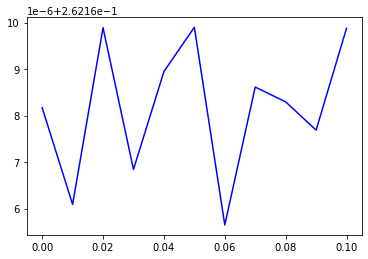

In [194]:
def performance_metrics(y_pred_test, y_test):
    '''gives the TPR, FPR, acc, precision, recall and F1 score by comparing the 2 input arrays'''
    #for precision, recall, class 1 will be positive class (ie the person ahs a health condition) 
    #and 0 as negative class (no health condition)
    TP = np.logical_and(y_pred_test==y_test,y_pred_test == 1).sum()
    FP = np.logical_and(y_pred_test!=y_test,y_pred_test == 1).sum()
    TN = np.logical_and(y_pred_test==y_test,y_pred_test == 0).sum()
    FN = np.logical_and(y_pred_test!=y_test,y_pred_test == 0).sum()
    ACC = (TP+TN)/(TP+TN+FP+FN)
    P = (TP)/(TP+FP)
    R = (TP)/(TP+FN)
    F1 = 2*P*R/(P+R)
    TPR = R
    FPR = FP/(FP+TN)
    
    # return {'accuracy':ACC, 'precision':P, 'recall':R, 'F1':F1, 'TPR':TPR, 'FPR': FPR}
    return [ACC, P, R, F1, TPR, FPR]

intervals = 11

threshold = np.linspace(0,0.1,intervals)
losses = []

for i in range(intervals):
    W00 = np.random.random((X_train.shape[1],1))
    W00, l1, l2 = sgd_generic(W00,X_train,Y_train,X_test,Y_test,rate,num_iter,1,0,0)
    losses.append(l2[-1])

plt.plot(threshold,losses,'b')